<a href="https://colab.research.google.com/github/nana881023/ML/blob/main/HW3_CDC_Diabetes_Health_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW2

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo  # 從 ucimlrepo 導入 fetch_ucirepo 函數
import pandas as pd  # 導入 pandas 庫用於數據處理
import numpy as np  # 導入 numpy 庫用於數值計算
from sklearn.model_selection import train_test_split  # 導入用於數據集分割的函數
from sklearn.feature_selection import SelectKBest, f_classif  # 導入用於特徵選擇的工具
from sklearn.decomposition import PCA  # 導入主成分分析工具
from imblearn.over_sampling import SMOTE  # 導入 SMOTE 用於處理類別不平衡
from sklearn.ensemble import RandomForestClassifier  # 導入隨機森林分類器
from sklearn.metrics import classification_report, confusion_matrix  # 導入模型評估工具
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 導入標準化和正規化工具

In [ ]:
# 獲取數據集
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)   # 使用 ID 891 獲取 CDC 糖尿病健康指標數據集

# 數據（以 pandas 數據框的形式）
X = cdc_diabetes_health_indicators.data.features   # 獲取特徵數據
y = cdc_diabetes_health_indicators.data.targets    # 獲取目標數據

# 元數據
print(cdc_diabetes_health_indicators.metadata)   # 打印數據集的元數據

# 變量信息
print(cdc_diabetes_health_indicators.variables)   # 打印數據集中變量的信息

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
# 輸出特徵數量和目標變量數量
print(f"特徵數量: {X.shape[1]}")
print(f"目標變量數量: {y.shape[1]}")

# 查看特徵數據的前幾行
print("\n特徵數據的前 5 行：")
print(X.head())

# 查看目標數據的前幾行
print("\n目標數據的前 5 行：")
print(y.head())

# 查看特徵數據的基本信息
print("\n特徵數據的基本信息：")
print(X.info())

# 查看特徵數據的統計摘要
print("\n特徵數據的統計摘要：")
print(X.describe())

# 查看特徵數據的列名
print("\n特徵數據的列名：")
print(X.columns.tolist())

# 檢查是否有缺失值
print("\n各列的缺失值數量：")
print(X.isnull().sum())

# 顯示每個特徵的唯一值數量
print("\n每個特徵的唯一值數量：")
print(X.nunique())

# 查看數據框的形狀
print("\n特徵數據的形狀：", X.shape)
print("目標數據的形狀：", y.shape)

# 查看目標變量的分佈
print("\n目標變量的分佈：")
print(y['Diabetes_binary'].value_counts(normalize=True))

特徵數量: 21
目標變量數量: 1

特徵數據的前 5 行：
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             0       0        1  ...              1            0        5   
1             1       0        0  ...              0            1        3   
2             0       1        0  ...              1            1        5   
3             1       1        1  ...              1            0        2   
4             1       1        1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex

In [ ]:
# 合併特徵和目標數據
full_data = pd.concat([X, y], axis=1)

# 創建一個函數來確定列的類型
def determine_column_type(column):
    if column.nunique() == 2:
        return 'Binary'
    else:
        return 'int'

# 創建一個字典來存儲每列的類型
column_types = {col: determine_column_type(full_data[col]) for col in full_data.columns}

# 輸出每列的名稱和類型
print("列名和數據類型：")
for col, col_type in column_types.items():
    print(f"{col}: {col_type}")

# 輸出特徵數量和目標變量數量
print(f"\n特徵數量: {X.shape[1]}")
print(f"目標變量數量: {y.shape[1]}")

# 分別計算 Binary 和 int 類型的列數
binary_count = sum(1 for col_type in column_types.values() if col_type == 'Binary')
int_count = sum(1 for col_type in column_types.values() if col_type == 'int')

print(f"\nBinary 類型的列數: {binary_count}")
print(f"int 類型的列數: {int_count}")

# 查看數據框的形狀
print("\n特徵數據的形狀：", X.shape)
print("目標數據的形狀：", y.shape)

# 顯示每個特徵的唯一值數量
print("\n每個特徵的唯一值數量：")
print(full_data.nunique())

列名和數據類型：
HighBP: Binary
HighChol: Binary
CholCheck: Binary
BMI: int
Smoker: Binary
Stroke: Binary
HeartDiseaseorAttack: Binary
PhysActivity: Binary
Fruits: Binary
Veggies: Binary
HvyAlcoholConsump: Binary
AnyHealthcare: Binary
NoDocbcCost: Binary
GenHlth: int
MentHlth: int
PhysHlth: int
DiffWalk: Binary
Sex: Binary
Age: int
Education: int
Income: int
Diabetes_binary: Binary

特徵數量: 21
目標變量數量: 1

Binary 類型的列數: 15
int 類型的列數: 7

特徵數據的形狀： (253680, 21)
目標數據的形狀： (253680, 1)

每個特徵的唯一值數量：
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Ed

- 資料正規化

In [ ]:
# 定義 Int 型特徵
int_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# 創建 MinMaxScaler 對象
scaler = MinMaxScaler()

# 對 Int 型特徵進行正規化
X_normalized = X.copy()
X_normalized[int_features] = scaler.fit_transform(X[int_features])

# 顯示原始數據和正規化後的數據
print("原始 Int 型特徵的統計摘要：")
print(X[int_features].describe())

print("\n正規化後 Int 型特徵的統計摘要：")
print(X_normalized[int_features].describe())

# 檢查正規化後的數據範圍
print("\n正規化後 Int 型特徵的最小值：")
print(X_normalized[int_features].min())

print("\n正規化後 Int 型特徵的最大值：")
print(X_normalized[int_features].max())

# 顯示正規化前後的前幾行數據對比
print("\n正規化前的前 5 行數據（僅 Int 型特徵）：")
print(X[int_features].head())

print("\n正規化後的前 5 行數據（僅 Int 型特徵）：")
print(X_normalized[int_features].head())

# 確保其他特徵保持不變
binary_features = [col for col in X.columns if col not in int_features]
print("\n確認二元特徵未被改變：")
for feature in binary_features:
    if not X[feature].equals(X_normalized[feature]):
        print(f"{feature} 已被改變")
    else:
        print(f"{feature} 保持不變")

# 將正規化後的特徵與目標變量合併
final_data = pd.concat([X_normalized, y], axis=1)

print("\n最終數據集的形狀：", final_data.shape)
print("\n最終數據集的列：", final_data.columns.tolist())

# 檢查是否所有特徵都被正確處理
all_features = set(X.columns)
processed_features = set(int_features + binary_features)
if all_features == processed_features:
    print("\n所有特徵都已被正確處理")
else:
    missed_features = all_features - processed_features
    print(f"\n警告：以下特徵未被處理：{missed_features}")

原始 Int 型特徵的統計摘要：
                 BMI        GenHlth       MentHlth       PhysHlth  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean       28.382364       2.511392       3.184772       4.242081   
std         6.608694       1.068477       7.412847       8.717951   
min        12.000000       1.000000       0.000000       0.000000   
25%        24.000000       2.000000       0.000000       0.000000   
50%        27.000000       2.000000       0.000000       0.000000   
75%        31.000000       3.000000       2.000000       3.000000   
max        98.000000       5.000000      30.000000      30.000000   

                 Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  
mean        8.032119       5.050434       6.053875  
std         3.054220       0.985774       2.071148  
min         1.000000       1.000000       1.000000  
25%         6.000000       4.000000       5.000000  
50%         8.000000       5.000000       7

In [ ]:
# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 將數據分為訓練集和測試集，測試集佔 20%

print("訓練集形狀:", X_train.shape)  # 顯示訓練集的形狀
print("測試集形狀:", X_test.shape)  # 顯示測試集的形狀

訓練集形狀: (202944, 21)
測試集形狀: (50736, 21)


In [ ]:
# 確保 y_train 是一維數組
y_train = np.ravel(y_train)  # 使用 numpy 的 ravel() 函數將 y_train 轉換為一維數組

# 特徵選擇
selector = SelectKBest(f_classif, k=10)  # 初始化特徵選擇器，選擇前 10 個最重要的特徵
X_train_selected = selector.fit_transform(X_train, y_train)  # 對訓練集進行特徵選擇並轉換
X_test_selected = selector.transform(X_test)  # 對測試集應用相同的特徵選擇

# 獲取被選中的特徵名稱
selected_features = X.columns[selector.get_support()].tolist()  # 獲取被選中的特徵名稱列表
print("選中的特徵:", selected_features)  # 顯示被選中的特徵

# 顯示每個被選中特徵的 F-score
feature_scores = pd.DataFrame({'Feature': selected_features, 'F-score': selector.scores_[selector.get_support()]})  # 創建包含特徵名稱和對應 F-score 的 DataFrame
feature_scores = feature_scores.sort_values('F-score', ascending=False)  # 按 F-score 降序排序
print("\n特徵的 F-score:")
print(feature_scores)  # 顯示排序後的特徵 F-score

選中的特徵: ['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']

特徵的 F-score:
                Feature       F-score
4               GenHlth  19058.462779
0                HighBP  14992.117304
6              DiffWalk  10367.102908
2                   BMI  10068.455458
1              HighChol   8223.863666
3  HeartDiseaseorAttack   6714.753915
7                   Age   6566.026966
5              PhysHlth   6117.917370
9                Income   5610.128048
8             Education   3194.047613


- PCA

原始的 10 個特徵：
['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']

PCA 後的特徵數量: 9

每個主成分保留的方差比例：
[0.29791255 0.13360395 0.10670432 0.09996246 0.08060054 0.0735674
 0.06105432 0.05408227 0.04983601]

累積解釋方差比：
[0.29791255 0.4315165  0.53822082 0.63818328 0.71878383 0.79235123
 0.85340555 0.90748782 0.95732383]

原始特徵對 PCA 的貢獻：
                Feature  Importance
7                   Age    0.121821
6              DiffWalk    0.112881
0                HighBP    0.109657
8             Education    0.107532
2                   BMI    0.104995
9                Income    0.098572
1              HighChol    0.094593
5              PhysHlth    0.093799
3  HeartDiseaseorAttack    0.079848
4               GenHlth    0.076304


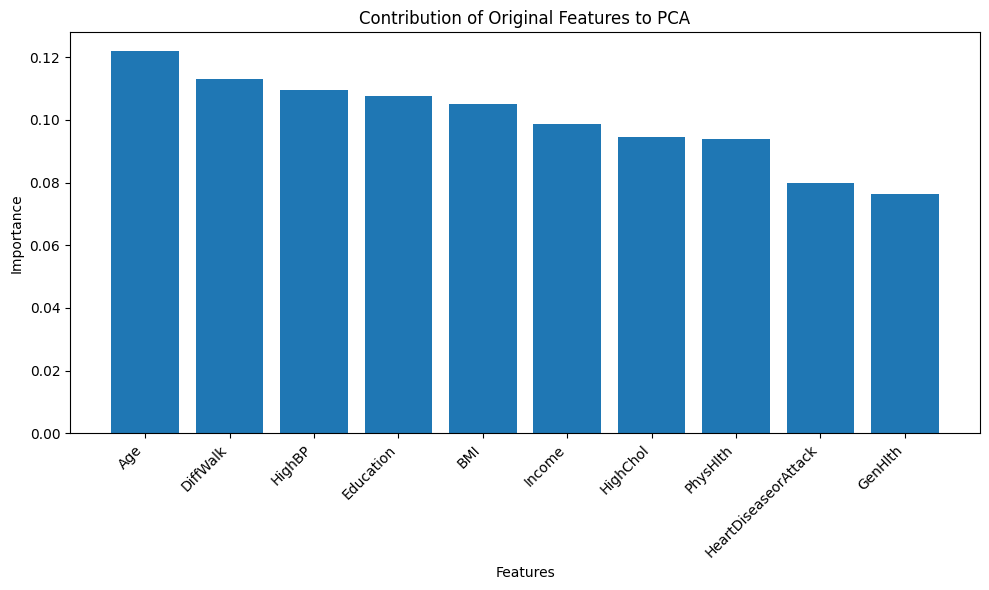

In [ ]:
# PCA

import matplotlib.pyplot as plt

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# 應用 PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 顯示原始特徵
print("原始的 10 個特徵：")
print(selected_features)

# 顯示 PCA 後的特徵數量
print(f"\nPCA 後的特徵數量: {X_train_pca.shape[1]}")

# 顯示每個主成分保留的方差比例
print("\n每個主成分保留的方差比例：")
print(pca.explained_variance_ratio_)

# 顯示累積解釋方差比
print("\n累積解釋方差比：")
print(np.cumsum(pca.explained_variance_ratio_))

# 分析特徵重要性
feature_importance = np.abs(pca.components_).sum(axis=0)
feature_importance /= feature_importance.sum()

# 創建一個 DataFrame 來顯示每個原始特徵對 PCA 的貢獻
feature_contributions = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
})
feature_contributions = feature_contributions.sort_values('Importance', ascending=False)

print("\n原始特徵對 PCA 的貢獻：")
print(feature_contributions)

# 視覺化特徵貢獻
plt.figure(figsize=(10, 6))
plt.bar(feature_contributions['Feature'], feature_contributions['Importance'])
plt.title('Contribution of Original Features to PCA')
plt.xlabel('Features')
plt.ylabel('Importance')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- 資料不平衡

In [ ]:
# SMOTE過採樣
smote = SMOTE(random_state=42)  # 初始化 SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)  # 對訓練集進行過採樣

print("過採樣後的訓練集形狀:", X_train_resampled.shape)  # 顯示過採樣後訓練集的形狀
print("過採樣後的類別分佈:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))  # 顯示過採樣後目標變量的分佈


過採樣後的訓練集形狀: (349190, 9)
過採樣後的類別分佈:
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
# 訓練模型
clf = RandomForestClassifier(random_state=42)  # 初始化隨機森林分類器
clf.fit(X_train_resampled, y_train_resampled)  # 使用過採樣後的訓練集訓練模型

RandomForestClassifier(random_state=42)

In [ ]:
# 在測試集上評估
y_pred = clf.predict(X_test_pca)  # 使用訓練好的模型對測試集進行預測
print("分類報告:")
print(classification_report(y_test, y_pred))  # 顯示分類報告，包括精確度、召回率等指標
print("\n混淆矩陣:")
print(confusion_matrix(y_test, y_pred))  # 顯示混淆矩陣

分類報告:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88     43739
           1       0.34      0.50      0.40      6997

    accuracy                           0.80     50736
   macro avg       0.63      0.67      0.64     50736
weighted avg       0.83      0.80      0.81     50736


混淆矩陣:
[[36938  6801]
 [ 3497  3500]]


In [ ]:
# 特徵重要性（可選）
if hasattr(clf, 'feature_importances_'):  # 檢查分類器是否有 feature_importances_ 屬性
    importances = clf.feature_importances_  # 獲取特徵重要性
    feature_imp = pd.DataFrame(sorted(zip(importances, selected_features), reverse=True),
                               columns=['Importance', 'Feature'])  # 創建特徵重要性的 DataFrame
    print("\n特徵重要性:")
    print(feature_imp)  # 顯示特徵重要性


特徵重要性:
   Importance               Feature
0    0.277585                HighBP
1    0.115265               GenHlth
2    0.099359  HeartDiseaseorAttack
3    0.095704                   BMI
4    0.088928              HighChol
5    0.086520             Education
6    0.082291                   Age
7    0.078476              PhysHlth
8    0.075871              DiffWalk


In [ ]:
# prompt: 寫出準確率和MSE
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"準確率: {accuracy}")

# 計算 MSE (需要將目標變量轉換為數值型)
# 假設 y_test 和 y_pred 都是數值型
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

準確率: 0.7970277514979501
MSE: 0.20297224850204984


## HW3

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo  # 從 ucimlrepo 導入 fetch_ucirepo 函數
import pandas as pd  # 導入 pandas 庫用於數據處理
import numpy as np  # 導入 numpy 庫用於數值計算
from sklearn.model_selection import train_test_split  # 導入用於數據集分割的函數
from sklearn.feature_selection import SelectKBest, f_classif  # 導入用於特徵選擇的工具
from sklearn.decomposition import PCA  # 導入主成分分析工具
from imblearn.over_sampling import SMOTE  # 導入 SMOTE 用於處理類別不平衡
from sklearn.ensemble import RandomForestClassifier  # 導入隨機森林分類器
from sklearn.metrics import classification_report, confusion_matrix  # 導入模型評估工具
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 導入標準化和正規化工具

In [ ]:
# 獲取數據集
cdc_diabetes_health_indicators3 = fetch_ucirepo(id=891)   # 使用 ID 891 獲取 CDC 糖尿病健康指標數據集

# 數據（以 pandas 數據框的形式）
X3 = cdc_diabetes_health_indicators3.data.features   # 獲取特徵數據
y3 = cdc_diabetes_health_indicators3.data.targets    # 獲取目標數據

# 元數據
print(cdc_diabetes_health_indicators3.metadata)   # 打印數據集的元數據

# 變量信息
print(cdc_diabetes_health_indicators3.variables)   # 打印數據集中變量的信息

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
# 移除敏感變數 Sex, Income, Education
sensitive_columns = ['Sex', 'Income', 'Education']  # 注意大小寫需與資料集一致
X3 = X3.drop(columns=sensitive_columns)

# 確認剩餘特徵
print("移除敏感變數後的特徵數據集形狀:", X3.shape)
print("移除敏感變數後的特徵名稱:")
print(X3.columns)


移除敏感變數後的特徵數據集形狀: (253680, 18)
移除敏感變數後的特徵名稱:
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age'],
      dtype='object')


In [ ]:
# 匯入 SMOTE 和分割資料集的套件
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 分割資料集為訓練集和測試集
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

# 初始化 SMOTE 並應用於訓練集
smote3 = SMOTE(random_state=42)
X3_train_resampled, y3_train_resampled = smote3.fit_resample(X3_train, y3_train)

# 顯示過採樣後的類別分佈
print("過採樣後的類別分佈:")
print(y3_train_resampled.iloc[:, 0].value_counts(normalize=True))


過採樣後的類別分佈:
Diabetes_binary
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
# 應用多項式回歸並訓練模型

# 匯入 PolynomialFeatures 和線性回歸模型
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 對特徵進行二次多項式變換
poly3 = PolynomialFeatures(degree=2)
X3_train_poly = poly3.fit_transform(X3_train_resampled)
X3_test_poly = poly3.transform(X3_test)

# 訓練多項式回歸模型
model_poly3 = LinearRegression()
model_poly3.fit(X3_train_poly, y3_train_resampled)

# 使用測試集進行預測並計算 MSE
y3_pred = model_poly3.predict(X3_test_poly)
mse3 = mean_squared_error(y3_test, y3_pred)
print("移除敏感變數後的多項式回歸模型 MSE:", mse3)


移除敏感變數後的多項式回歸模型 MSE: 0.18550788968411747


In [ ]:
# 假設先前使用 PCA 處理的模型的 MSE 為 mse_pca

# 比較兩個模型的 MSE
print("原始 PCA 模型的 MSE:", mse)
print("移除敏感變數後的多項式回歸模型 MSE:", mse3)

if mse3 < mse:
    print("移除敏感變數的模型在 MSE 上更優。")
else:
    print("原始 PCA 模型在 MSE 上更優。")


原始 PCA 模型的 MSE: 0.20297224850204984
移除敏感變數後的多項式回歸模型 MSE: 0.18550788968411747
移除敏感變數的模型在 MSE 上更優。
